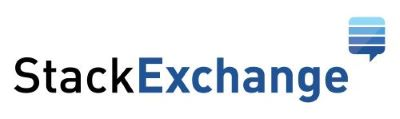                                   

# Project: Popular Data Science Questions

In this project the focus will be on the Data Science forums on Stack Exhchange. 

This section is known as [Data Science Stack Exchange](https://datascience.stackexchange.com/). 

DSSE is a question and answer forum used by Data Scientists. The questions asked are all data science related. ex: machine learning, python, datasets, etc. 

- The questions cannot be subjective or opinion based. They also cannot require too many possible answers or require a lengthy answer. 

The site's home page is subdivided by questions and tags. 
You can search questions, tags, registered users, companies, and unanswered questions. 

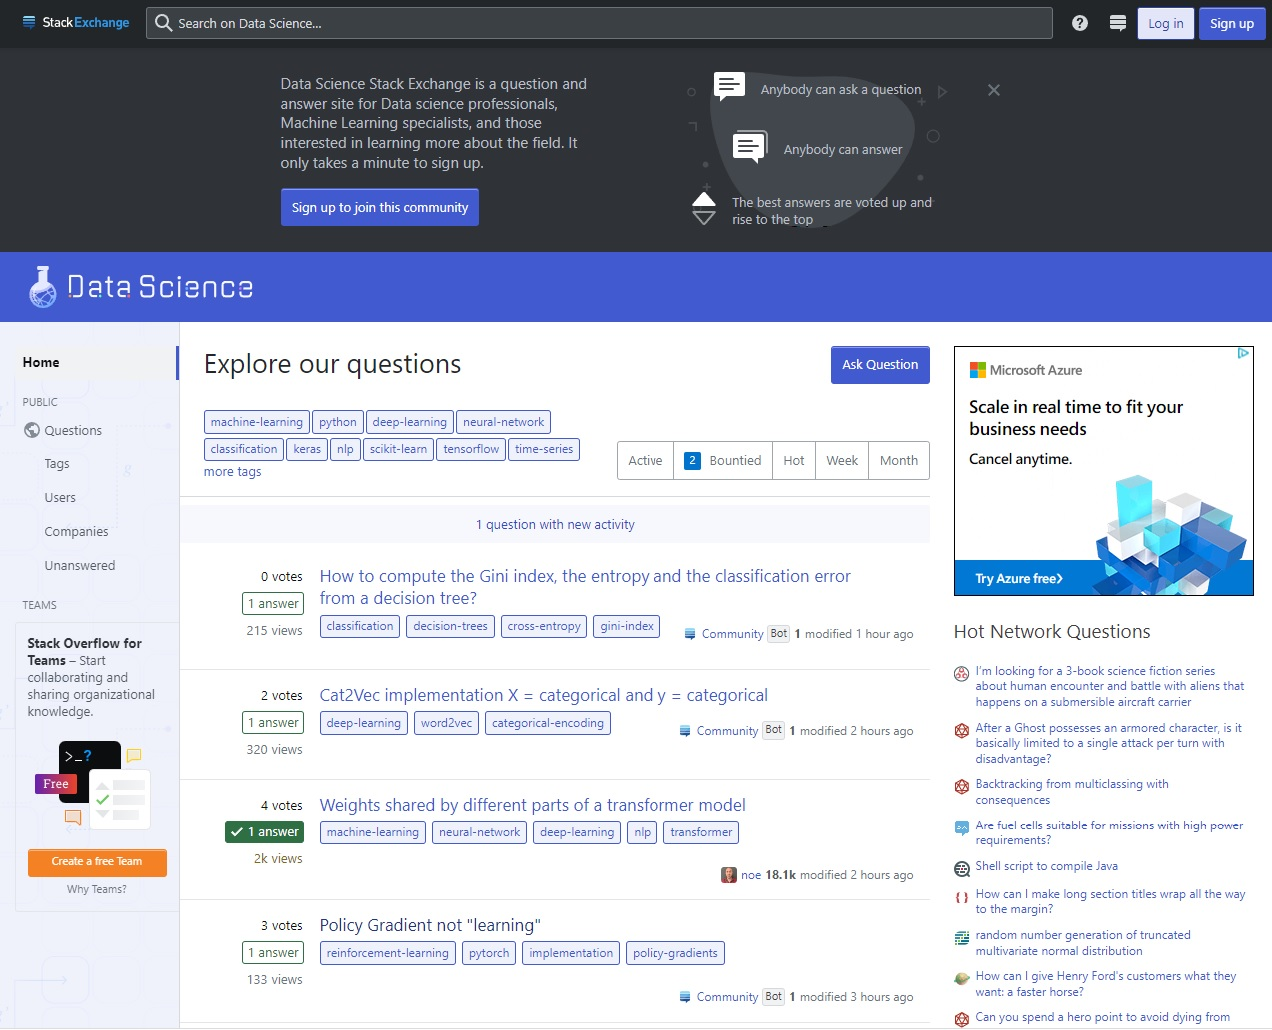

### Stack Exchange Data Explorer

While exploring the Stack Exchange Data Explorer I noticed many of the top answered posts had to do with python machine learning and deep learning. 

The here is a snippet of the top 10 most answered posts.



 Id  | ViewCount | CommentCount | AnswerCount | Tags 
 ----|-----------|--------------|-------------|------------------ 
  155|   32247   |     9        |35           |open-source/dataset
12851|202134|3|19|machine-learning/neural-network/deep-learning/visualization
694|125450|13|17|machine-learning/python/neural-network
15135|342667|0|16|machine-learning/scikit-learn/cross-validation
8941|3623|1|14|community
326|118938|3|14|machine-learning>/r/python
334|19824|7|13|education
42621|25560|10|13|machine-learning/neural-network/deep-learning
22|284627|3|13|data-mining/clustering/octave/k-means/categorical-data
19|19507|5|12|bigdata/scalability/efficiency/performance

<br>
<br>
<br>
<br>
<br>
<br>
            I decided to break it down by how users tagged their questions here is the top 5 results. 


Tags |	Counts
--------|-------------
machine-learning |	433
python-pandas |	195
neural-network |	179
R |	155
python	|151


As we can see tags will be a good method to explore the data as well as other metrics such as answers and comments. Questions with low answers can be a good source for what information is lacking. 

### Getting the Data from Stack Exchange for 2022. 

One great feature of Stack Exchange is it has its own SQL database. I was able to pull the csv file from them very easily. 

Here is a link to their page where you can generate [Stack Exchange Queries](https://data.stackexchange.com/stackoverflow/query/new)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import datetime
%matplotlib inline
import seaborn as sns
style.use('seaborn')

DSSE_2022 = pd.read_csv('QueryResults (6).csv')

C:\Users\marko\AppData\Local\Temp\ipykernel_70532\3211206729.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


In [3]:
DSSE_2022.head()

,Id,CreationDate,Score,ViewCount,OwnerUserId,LastActivityDate,Title,Tags,AnswerCount,CommentCount
0,71348360,2022-03-04 08:13:14,0,87,18354294.0,2022-03-04 08:13:14,Dynatrace registry for Micrometer changes beha...,<spring-boot><spring-micrometer><dynatrace>,0,0
1,71348364,2022-03-04 08:13:34,0,45,18371161.0,2022-03-04 11:13:14,SQL multiple relation but only the latest shal...,<mysql><sql><sql-server>,1,5
2,71348374,2022-03-04 08:15:14,0,69,18371453.0,2022-03-04 16:12:41,Output a Single Row from a MySQL Database in a...,<php><mysql>,1,6
3,71348375,2022-03-04 08:15:31,0,185,14883431.0,2022-03-04 08:48:49,Dependency bean not injected when TestNG is us...,<spring-boot><selenium><testng>,1,0
4,71348376,2022-03-04 08:15:38,3,2455,14630738.0,2022-03-16 11:54:25,Spring Security in response to registration I ...,<spring-security>,4,13


In [4]:
DSSE_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                50000 non-null  int64  
 1   CreationDate      50000 non-null  object 
 2   Score             50000 non-null  int64  
 3   ViewCount         50000 non-null  int64  
 4   OwnerUserId       49363 non-null  float64
 5   LastActivityDate  50000 non-null  object 
 6   Title             50000 non-null  object 
 7   Tags              50000 non-null  object 
 8   AnswerCount       50000 non-null  int64  
 9   CommentCount      50000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 3.8+ MB


### Cleaning the Data

Looking at the data the only missing information is some OwnerUserId's this should not be much of an issue since we have close to 99% of the data. 
The OwnerUserId interestingly is coded as a float data type. So I will convert this into a integer. I will also change the CreationDate and LastActivityDate column to a datetime datatype. 

The Tags column can be cleaned up as well, removing the <> symbols so we can split the tags. 

In [5]:
# converting the date columns to dt.datetime. 
DSSE_2022['CreationDate'] = DSSE_2022['CreationDate'].apply(pd.to_datetime)
DSSE_2022['LastActivityDate'] = DSSE_2022['LastActivityDate'].apply(pd.to_datetime)

# zero'd out the NaN values so I can convert to integer.
DSSE_2022['OwnerUserId'] = DSSE_2022['OwnerUserId'].fillna(0)
DSSE_2022['OwnerUserId']= DSSE_2022['OwnerUserId'].astype(np.int64)

In [6]:
DSSE_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                50000 non-null  int64         
 1   CreationDate      50000 non-null  datetime64[ns]
 2   Score             50000 non-null  int64         
 3   ViewCount         50000 non-null  int64         
 4   OwnerUserId       50000 non-null  int64         
 5   LastActivityDate  50000 non-null  datetime64[ns]
 6   Title             50000 non-null  object        
 7   Tags              50000 non-null  object        
 8   AnswerCount       50000 non-null  int64         
 9   CommentCount      50000 non-null  int64         
dtypes: datetime64[ns](2), int64(6), object(2)
memory usage: 3.8+ MB


In [7]:
DSSE_2022['Tags'] = DSSE_2022['Tags'].astype(str)
DSSE_2022['Tags'].head()

0    <spring-boot><spring-micrometer><dynatrace>
1                       <mysql><sql><sql-server>
2                                   <php><mysql>
3                <spring-boot><selenium><testng>
4                              <spring-security>
Name: Tags, dtype: object

In [8]:
#cleaning the tags column
DSSE_2022['Tags'] = DSSE_2022['Tags'].str.replace('^<|>$', '', regex=True).str.split('><')



In [9]:
print(DSSE_2022['Tags'])

0              [spring-boot, spring-micrometer, dynatrace]
1                                 [mysql, sql, sql-server]
2                                             [php, mysql]
3                          [spring-boot, selenium, testng]
4                                        [spring-security]
                               ...                        
49995                             [api, security, backend]
49996    [json, api, attributes, azure-functions, azure...
49997                                                  [r]
49998                                         [nginx, ssl]
49999                                             [oracle]
Name: Tags, Length: 50000, dtype: object


### Exploring the Tags Column

Now since we cleaned the data. I will explore the Tag column to see what are the top 15 most used tags. 

In [10]:
tag_count = {}
for tags in DSSE_2022['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
            
            
tags_2022 = pd.DataFrame.from_dict(tag_count, orient='index', columns=['count'])
top_15 = tags_2022.sort_values('count', ascending=False).head(15)   

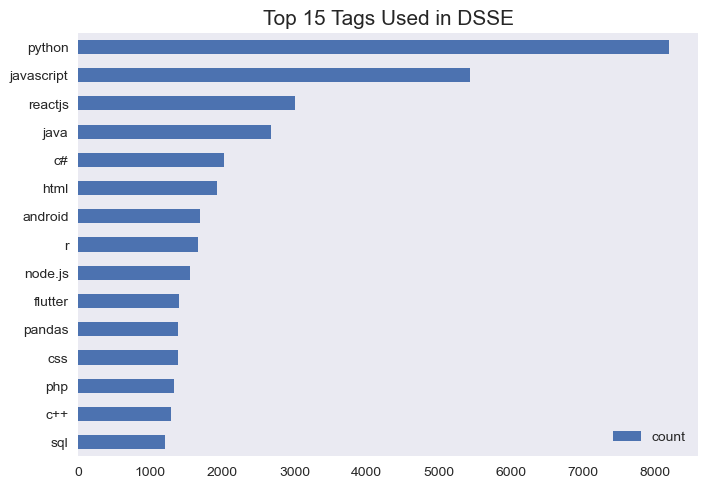

In [11]:
ax = top_15.plot(kind='barh')
ax.invert_yaxis()
ax.set_title('Top 15 Tags Used in DSSE', size=15)
ax.grid(False)

Python and javascript are by far the 2 largest tags used. Lets see how the viewed tags look.

In [12]:
view_count ={}

for index, row in DSSE_2022.iterrows():
    for tag in row['Tags']:
        if tag in view_count:
            view_count[tag] += row['ViewCount']
        else:
            view_count[tag] = row['ViewCount']

view_2022 = pd.DataFrame.from_dict(view_count, orient='index', columns=['views'])

top_view = view_2022.sort_values('views', ascending=False).head(15)


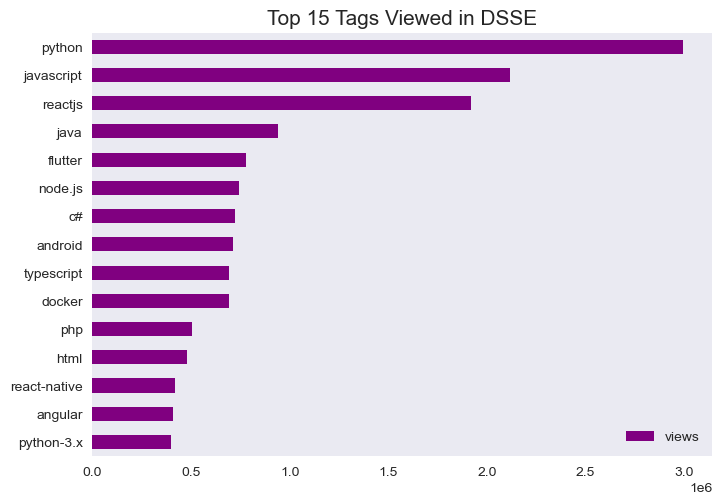

In [13]:
ax = top_view.plot(kind='barh', color='purple')
ax.invert_yaxis()
ax.set_title('Top 15 Tags Viewed in DSSE', size=15)
ax.grid(False)

### Comparing top 15 counts to top 15 viewed

In [14]:
print(top_15)
print(top_view)

            count
python       8195
javascript   5436
reactjs      3012
java         2675
c#           2021
html         1927
android      1690
r            1659
node.js      1551
flutter      1400
pandas       1381
css          1381
php          1326
c++          1289
sql          1204
                views
python        2994274
javascript    2116614
reactjs       1921294
java           938822
flutter        776426
node.js        743740
c#             722739
android        714175
typescript     691706
docker         690623
php            506428
html           477449
react-native   417076
angular        407465
python-3.x     397114


As we can see above we have a few in the _top viewed_ that are not in the most _tag counts_. 

__Microsoft typescript:__ is its own programming language which is a superset of Javascript. Simply put it is a refined Javascript with additional features. Typescript has been becoming increasingly more popular over the years and has actually surpassed Javascript in popularity amongst developers. 

An article on Typescripts increasing popularity [TypeScript Vaults Ahead of Java to Crack Stack Overflow Top 5](https://visualstudiomagazine.com/articles/2022/06/28/typescript-so.aspx)

__Docker:__ is a software platform that allows you to build, test, and create applications. According to Stack Overflow [Key Insights from Stack Overflow’s 2022 Developer Survey](https://www.docker.com/blog/key-insights-from-stack-overflows-2022-developer-survey/#:~:text=Gartner%20believes%20that%2070%25%20of,%231%20most%2Dwanted%20tool.). Docker is the most popular application creator in 2022. 


__React-native:__ is a application development software for smart phones. It is very close with flutter another application development software amongst popularity. Scroll down to [Other frameworks and libraries](https://survey.stackoverflow.co/2022/#most-popular-technologies-misc-tech-prof) to see the rankings. 

__Angular:__ is an application and desktop development platform. It is currently in the top 5 in popularity.  [Web frameworks and technologies](https://survey.stackoverflow.co/2022/#most-popular-technologies-webframe-prof)

__python-3.x:__ is referencing a version of python 3.

### Comparing the trend of tags overtime

The data I pulled is roughly the first half of 2022. The Stack Exchange query gives 50,000 rows max. I am going to compare this same time period against 2021. Lets see how the popularity has trended over the past 2 years during this time period. 

In [15]:
DSSE_2021 = pd.read_csv('QueryResults (7).csv')
print(DSSE_2021.head())

         Id         CreationDate  \
0  65526397  2021-01-01 00:01:40   
1  65526399  2021-01-01 00:02:06   
2  65526400  2021-01-01 00:02:09   
3  65526401  2021-01-01 00:02:17   
4  65526407  2021-01-01 00:03:01   

                                                Tags  
0                                 <r><search><arima>  
1  <javascript><xml><groovy><xml-parsing><sap-clo...  
2                           <docker><docker-compose>  
3                                           <python>  
4               <php><jquery><css><templates><whmcs>  


In [16]:
# cleaning the tags column 
DSSE_2021['Tags'] = DSSE_2021['Tags'].astype(str)
DSSE_2021['Tags'] = DSSE_2021['Tags'].str.replace('^<|>$', '', regex=True).str.split('><')
print(DSSE_2021['Tags'].head())


0                                   [r, search, arima]
1    [javascript, xml, groovy, xml-parsing, sap-clo...
2                             [docker, docker-compose]
3                                             [python]
4                 [php, jquery, css, templates, whmcs]
Name: Tags, dtype: object


In [17]:
tag_2021 = {}
for tags in DSSE_2021['Tags']:
    for tag in tags:
        if tag in tag_2021:
            tag_2021[tag] += 1
        else:
            tag_2021[tag] = 1
            
            
tag_2021_count = pd.DataFrame.from_dict(tag_2021, orient='index', columns=['count'])
top_15_2021 = tag_2021_count.sort_values('count', ascending=False).head(15)  

print(top_15_2021)

            count
python       8298
javascript   5867
java         2789
reactjs      2722
html         2289
c#           2194
android      1783
css          1622
r            1602
node.js      1594
php          1571
c++          1491
pandas       1463
sql          1362
flutter      1324


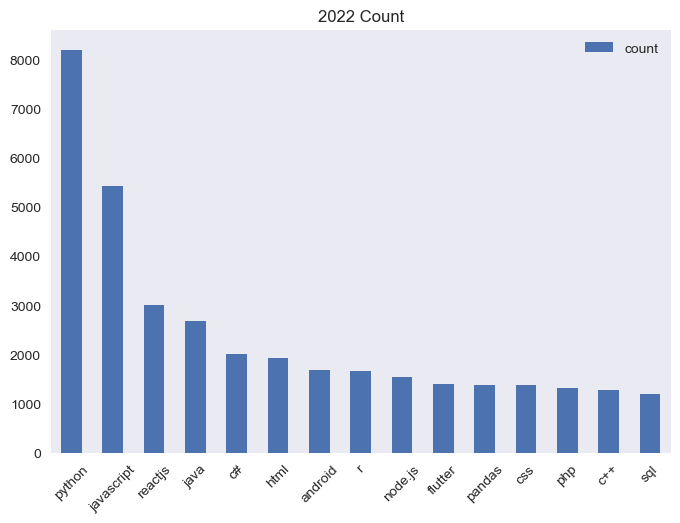

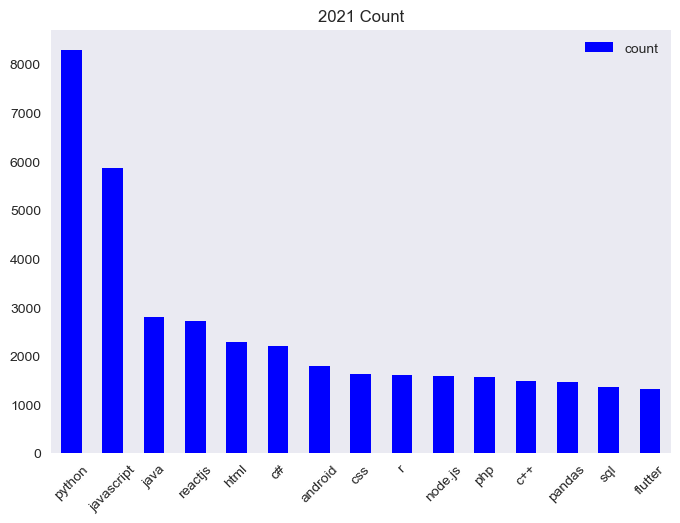

In [18]:
ax= top_15.plot(kind='bar')
ax.set_title('2022 Count')
ax.set_xticklabels(labels = top_15.index, rotation=45)
ax.grid(False)
ax2= top_15_2021.plot(kind='bar', color='blue')
ax2.set_xticklabels(labels = top_15_2021.index, rotation=45)
ax2.grid(False)
ax2.set_title('2021 Count')
plt.show()

As we can see above there is not much of a difference between the top used tags from 2022 and 2021. Some have switched positions in popularity. Lets see how other tags hold up like machine learning. Machine learning had the most answers in 2022 and a decent amount of tags. Lets see how machine learning has changed year over year.  

### Machine Learning tag exploration

Machine Learning is a field of artifical intelligence. Allowing a user to build systems to where the system can learn from historical data. Machine learning has other areas like deep learning and neural networks. Deep learning dives deeper into the world of Artificial Intelligence. I will narrow the search to just dealing with the 3 main machine learning tags over the span of several years. 

In [19]:
Machine = pd.read_csv('QueryResults (9).csv')

Machine['Tags'].value_counts()

<machine-learning>          597
<machine-translation>         9
<machine-learning-model>      3
Name: Tags, dtype: int64

In [20]:
Machine['CreationDate']= Machine['CreationDate'].apply(pd.to_datetime)

Machine['CreationDate']=Machine['CreationDate'].dt.strftime('%Y')

Machine_Learning = Machine['CreationDate'].value_counts().sort_index(axis=0)

print(Machine_Learning)



2009     1
2010     8
2011    17
2012    35
2013    45
2014    32
2015    36
2016    82
2017    85
2018    64
2019    78
2020    52
2021    21
2022    42
2023    11
Name: CreationDate, dtype: int64


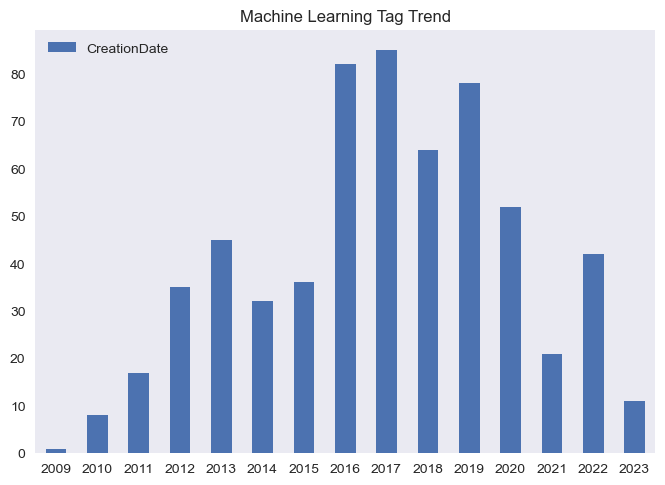

In [21]:
ax = Machine_Learning.plot(kind='bar')
ax.grid(False)
ax.set_xticklabels(Machine_Learning.index, rotation=0)
ax.set_title('Machine Learning Tag Trend')
ax.legend(loc='upper left')
plt.show()

As we can see the machine learning question posts hit an all time high in 2017. With its largest range being between the years 2016 and 2019. After that 4 year peak it has decreased. 2021 was a low level of tags but 2022 increased a good amount. 

Looking at 2023 having 11 tags already and only being in the month of Feburary it seems like Machine learning might be on the rise again if it continues the course. 

Even though the question posts decreased after 2019 I do not see machine learning decreasing below 2021 levels. Artifical intelligence uses are on the rise and gaining steam in main stream society. I believe this will just open the door for more companies to start exploring the uses for this technology. 

### Exploring additional columns in the 2022 dataset:

In [22]:
DSSE_2022.head()

,Id,CreationDate,Score,ViewCount,OwnerUserId,LastActivityDate,Title,Tags,AnswerCount,CommentCount
0,71348360,2022-03-04 08:13:14,0,87,18354294,2022-03-04 08:13:14,Dynatrace registry for Micrometer changes beha...,"[spring-boot, spring-micrometer, dynatrace]",0,0
1,71348364,2022-03-04 08:13:34,0,45,18371161,2022-03-04 11:13:14,SQL multiple relation but only the latest shal...,"[mysql, sql, sql-server]",1,5
2,71348374,2022-03-04 08:15:14,0,69,18371453,2022-03-04 16:12:41,Output a Single Row from a MySQL Database in a...,"[php, mysql]",1,6
3,71348375,2022-03-04 08:15:31,0,185,14883431,2022-03-04 08:48:49,Dependency bean not injected when TestNG is us...,"[spring-boot, selenium, testng]",1,0
4,71348376,2022-03-04 08:15:38,3,2455,14630738,2022-03-16 11:54:25,Spring Security in response to registration I ...,[spring-security],4,13


#### Zero answers:

In [23]:
display (DSSE_2022['AnswerCount'].value_counts())

1     23654
0     17933
2      6294
3      1562
4       380
5       119
6        34
7        14
8         3
10        2
12        2
9         2
11        1
Name: AnswerCount, dtype: int64

In [24]:
Unanswered = (17933 / 50000) * 100 

print('Total Unanswered Posts', Unanswered,'%')

Total Unanswered Posts 35.866 %


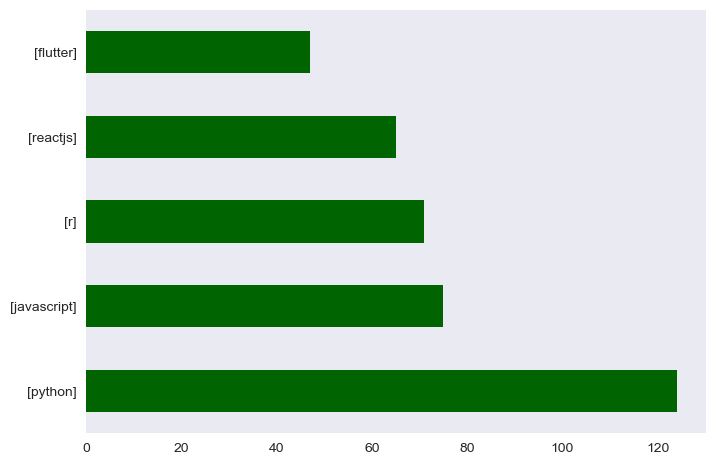

In [25]:
unanswered_questions = DSSE_2022.loc[DSSE_2022['AnswerCount'] == 0] 
unanswered_questions['Tags'].astype(str)
ax= (unanswered_questions['Tags'].value_counts().head()).plot(kind='barh', color='darkgreen')
ax.grid(False)

#### Zero Commented questions:

In [26]:
no_comments = unanswered_questions.loc[unanswered_questions['CommentCount'] == 0]

print(len(no_comments))

print('Total posts with no comments', ((7635 / 50000) * 100),'%' )

7635
Total posts with no comments 15.27 %


In [27]:
print(no_comments['ViewCount'].head())

0      87
27     28
31    961
33    322
34    614
Name: ViewCount, dtype: int64


In [28]:
no_comments['ViewCount'].sort_values(ascending=False).head()

674      3395
33086    2752
30679    2563
40493    2425
13991    2378
Name: ViewCount, dtype: int64

About 15% of all question posts dont receive a comment and about 36% go unanswered. This is interesting to see so many go unanswered on a question and answer forum. As you can see it does not mean the question post goes with no views. 

#### Top Views and top viewed question: 

In [29]:
print (DSSE_2022['ViewCount'].sort_values(ascending=False).head())

print(DSSE_2022.loc[4378])


4378     163134
27895    108574
20120     75910
25782     72060
47107     63707
Name: ViewCount, dtype: int64
Id                                                           71084718
CreationDate                                      2022-02-11 18:13:28
Score                                                              46
ViewCount                                                      163134
OwnerUserId                                                   8884625
LastActivityDate                                  2022-02-28 01:20:02
Title               "Docker Desktop stopped..." message after inst...
Tags                                           [docker, installation]
AnswerCount                                                         5
CommentCount                                                        7
Name: 4378, dtype: object


#### Exploring Scores Column:

In [30]:
DSSE_2022['Score'].sort_values()

40681   -11
2729     -8
21513    -8
42801    -8
22368    -7
         ..
11130    42
4378     46
11765    53
47107    63
27895    93
Name: Score, Length: 50000, dtype: int64

#### Worst Score Reputation Post: 

In [31]:
DSSE_2022.loc[40681]

Id                                             71752509
CreationDate                        2022-04-05 13:18:37
Score                                               -11
ViewCount                                            84
OwnerUserId                                    10419901
LastActivityDate                    2022-04-05 13:24:10
Title               What does Array. map() function do?
Tags                   [javascript, node.js, array-map]
AnswerCount                                           1
CommentCount                                          4
Name: 40681, dtype: object

#### HIghest Score Reputation Post:

In [32]:
DSSE_2022.loc[27895]

Id                                                           71718167
CreationDate                                      2022-04-02 13:56:15
Score                                                              93
ViewCount                                                      108574
OwnerUserId                                                  18391313
LastActivityDate                                  2022-07-12 13:09:25
Title               ImportError: cannot import name 'escape' from ...
Tags                    [python-3.x, compiler-errors, jinja2, pydash]
AnswerCount                                                         5
CommentCount                                                        0
Name: 27895, dtype: object

The 2nd highest viewed post is also the highest in Score reputation. Lets see what post was the most common Score type. 

#### Common Scores Per Post: 

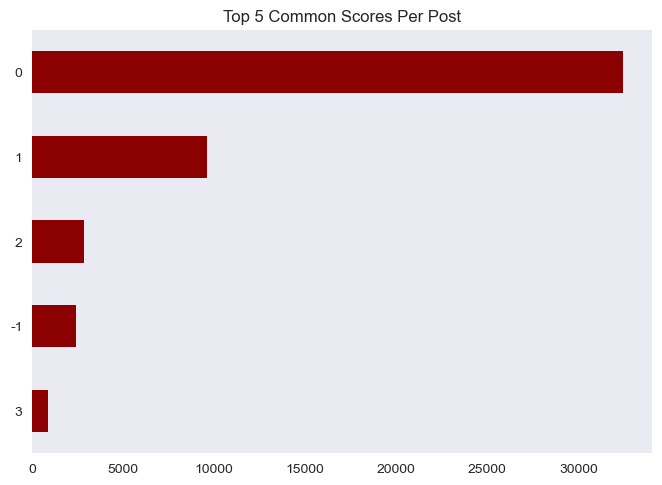

In [33]:
ax = DSSE_2022['Score'].value_counts().head().plot(kind='barh', color='darkred')
ax.invert_yaxis()
ax.grid(False)
ax.set_title('Top 5 Common Scores Per Post')
plt.show()

Seems like the majority of posts are not scored. Which means they were not up or down voted. 

### Conclusion: 

In this project I explored the Stack Exchange Data Science Question and Answer forum. Used their their Data Explorer to query the data I needed using the TSQL language. 

* I specifically explored the _Tags_ column for the top 15 most viewed and used tags of 2022. 
* Pulled in information from 2021 to compare the trend of tags between the two years.   
* Explored the trend of Machine Learning tags over the past 14 years.
* Explored additional columns in the 2022 dataset
